In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point, Polygon
import os

In [4]:
sns.set(style="darkgrid")

In [5]:
nb = os.path.join('Data Cleaning', 'Resources', 'Neighbourhoods', "Neighbourhoods.shp")
regions = gpd.read_file(nb)
regions['neighbourhood'] = regions['FIELD_7'].str.replace(' \(.+\)', '').str.lower()
regions.sample(5)

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,neighbourhood
135,2236,25886531,25926797,49885,124,124,Kennedy Park (124),Kennedy Park (124),None,None,-79.260382,43.725556,16493665,6.861056e+06,10530.202433,"POLYGON ((-79.24549 43.73060, -79.24555 43.730...",kennedy park
69,2170,25886598,25926731,49885,37,37,Willowdale West (37),Willowdale West (37),None,None,-79.427558,43.771210,16492609,5.533653e+06,10354.990437,"POLYGON ((-79.44043 43.76340, -79.44052 43.763...",willowdale west
111,2212,25886513,25926773,49885,138,138,Eglinton East (138),Eglinton East (138),None,None,-79.245598,43.740922,16493281,6.179031e+06,13864.264227,"POLYGON ((-79.24549 43.73060, -79.24602 43.731...",eglinton east
91,2192,25886351,25926753,49885,57,57,Broadview North (57),Broadview North (57),None,None,-79.355630,43.688825,16492961,3.341473e+06,9933.014855,"POLYGON ((-79.34627 43.68272, -79.34738 43.682...",broadview north
48,2149,25886994,25926710,49885,85,85,South Parkdale (85),South Parkdale (85),None,None,-79.439338,43.636700,16492273,4.369539e+06,14918.854844,"POLYGON ((-79.42778 43.62979, -79.42948 43.630...",south parkdale


In [6]:
starbucks_final = pd.read_csv('Data Cleaning/output_data/starbucks_final.csv', index_col='Hood_ID')
starbucks_final.drop('Unnamed: 0', axis='columns', inplace=True)
starbucks_final.head()

,Neighbourhood,Number of Stores
Hood_ID,,
76,bay street corridor,26
77,waterfront communities-the island,19
75,church-yonge corridor,8
14,islington-city centre west,8
95,annex,7


## Number of Starbucks Stores Heatmap

In [7]:
# Join the dataset with the available mapping files.
# We will fill in the neighbourhoods which were not present in the dataset with 0.
# this way we will still see the neighbourhood in the map, but no housing will be shown on it.
merged = regions.set_index('FIELD_6').join(starbucks_final)
merged = merged.reset_index()
merged = merged.fillna(0)
merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'Number of Stores']].sample(5)

,neighbourhood,FIELD_11,FIELD_12,geometry,Number of Stores
29,o'connor-parkview,-79.312228,43.706800,"POLYGON ((-79.33542 43.70320, -79.33529 43.703...",0.0
59,university,-79.401180,43.662506,"POLYGON ((-79.40772 43.65648, -79.40847 43.658...",0.0
77,annex,-79.404001,43.671585,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",7.0
25,newtonbrook west,-79.431422,43.785830,"POLYGON ((-79.44576 43.79241, -79.44335 43.792...",1.0
43,rosedale-moore park,-79.379669,43.682820,"POLYGON ((-79.36339 43.67532, -79.36425 43.675...",4.0


<ipython-input-8-626f97024072>:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),


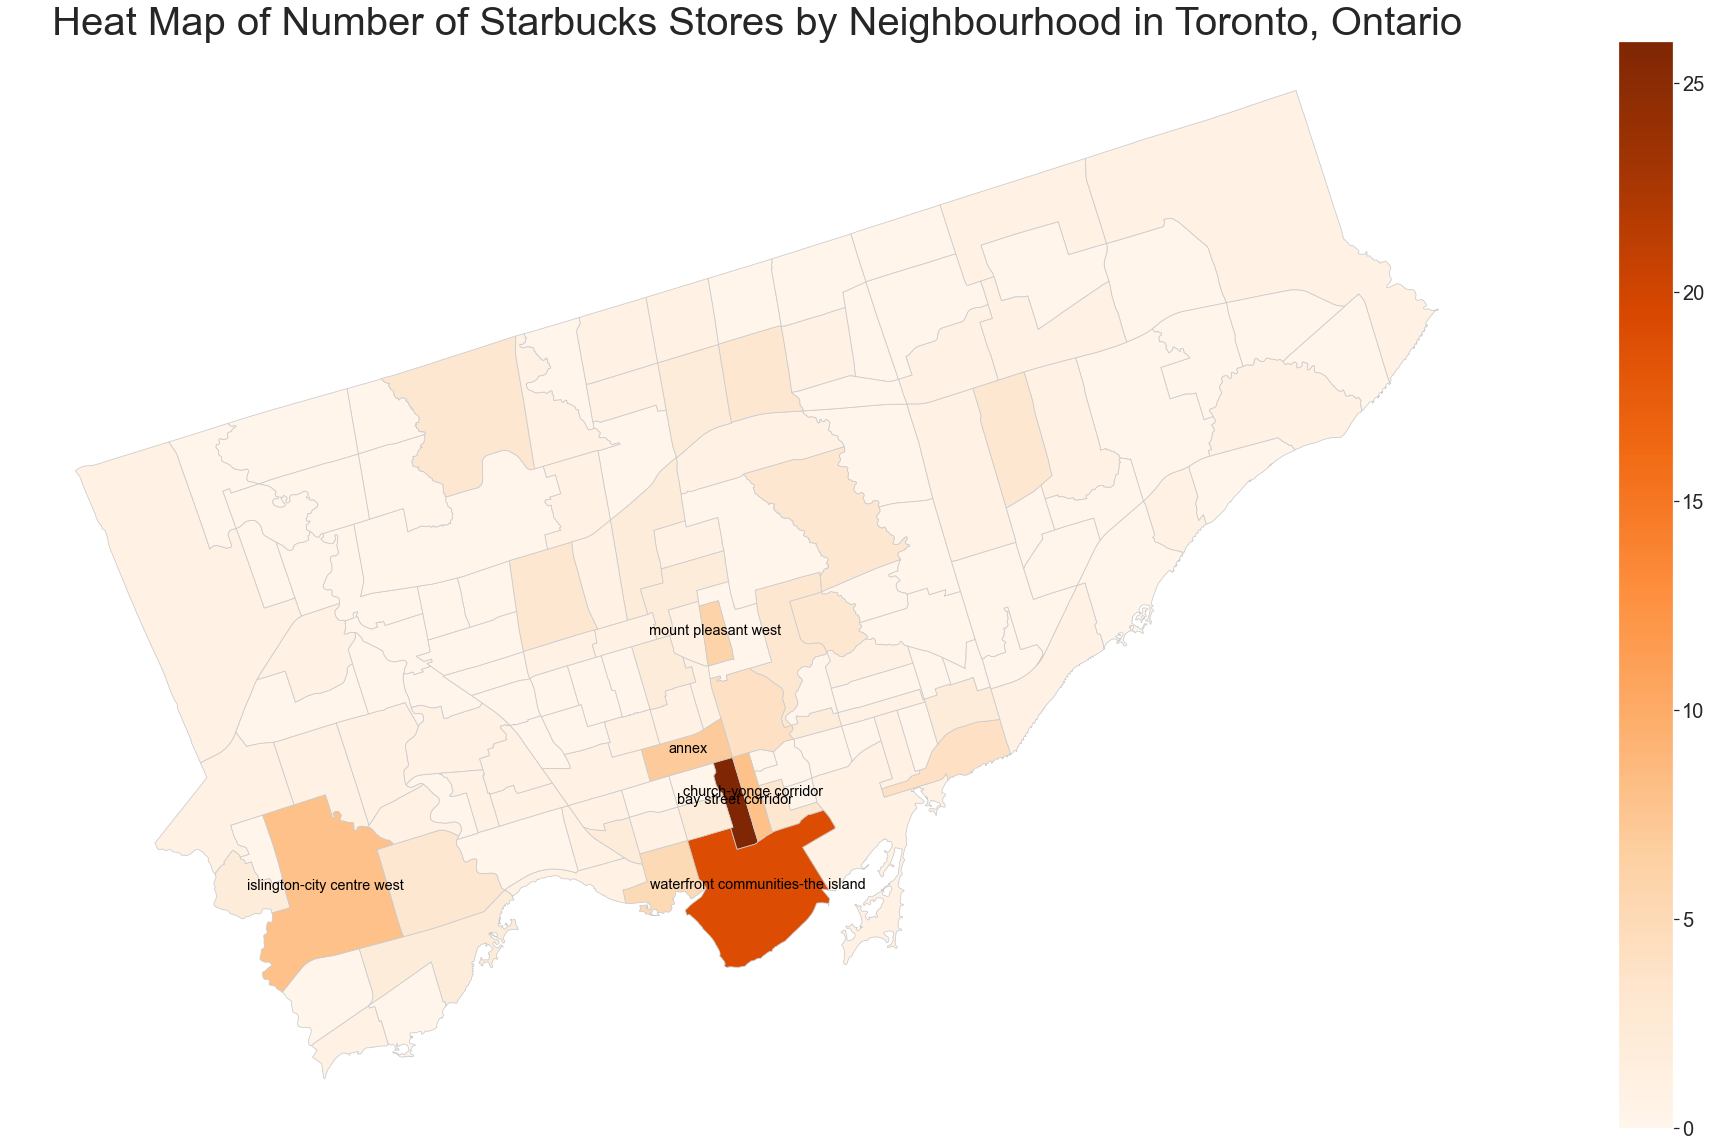

In [8]:
# we are using the maximum and minimum count values from the previous cell.
# setting additionally properties for the plot such as titles, turning of the axis for better visibility
# and setting the color scheme to look like a heat map.
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Number of Starbucks Stores by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})


# Create colorbar as a legend
# empty array for the data range
# add the colorbar to the figure
# set the color bar label text size
color = 'Oranges'
vmin, vmax = 0, 26
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
# we will only annotate the plot for neighbourhoods with more than 5 Starbucks Stores
merged.plot('Number of Stores', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in merged.iterrows():
    if(row['Number of Stores'] > 5):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
        
plt.show()

## Income Heatmap

In [9]:
income_heatmap_df = pd.read_csv('Final_Data', index_col='Hood_ID')
income_heatmap_df.drop('Unnamed: 0', axis='columns', inplace=True)
income_heatmap_df = income_heatmap_df.loc[:, ['Neighbourhood', 'Median_Income', 'Average_Income']]
income_heatmap_df

,Neighbourhood,Median_Income,Average_Income
Hood_ID,,,
85,South Parkdale,35601.0,46896.0
70,South Riverdale,65076.0,83491.0
40,St.Andrew-Windfields,94271.0,189629.0
61,Taylor-Massey,40915.0,51242.0
21,Humber Summit,57786.0,68431.0
...,...,...,...
106,Humewood-Cedarvale,57140.0,92623.0
14,Islington-City Centre West,66537.0,89289.0
66,Danforth,69640.0,85379.0


In [10]:
# Join the dataset with the available mapping files.
# We will fill in the neighbourhoods which were not present in the dataset with 0.
# this way we will still see the neighbourhood in the map, but no housing will be shown on it.
income_merged = regions.set_index('FIELD_6').join(income_heatmap_df)
income_merged = income_merged.reset_index()
income_merged.dropna(axis=0, how='any', subset=['Average_Income'], inplace=True)
income_merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'Median_Income', 'Average_Income']].sample(5)

,neighbourhood,FIELD_11,FIELD_12,geometry,Median_Income,Average_Income
107,downsview-roding-cfb,-79.490497,43.733292,"POLYGON ((-79.50783 43.71776, -79.50854 43.717...",47173.0,60018.0
136,kensington-chinatown,-79.397240,43.653554,"POLYGON ((-79.40401 43.64719, -79.40419 43.647...",40793.0,57175.0
5,lambton baby point,-79.496045,43.657420,"POLYGON ((-79.50552 43.66281, -79.50577 43.662...",69525.0,131273.0
139,l'amoreaux,-79.314084,43.795716,"POLYGON ((-79.28857 43.79607, -79.28921 43.795...",53644.0,67279.0
70,willowridge-martingrove-richview,-79.554221,43.683645,"POLYGON ((-79.52661 43.68233, -79.52705 43.682...",63701.0,81035.0


<ipython-input-11-a2468f710817>:18: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),


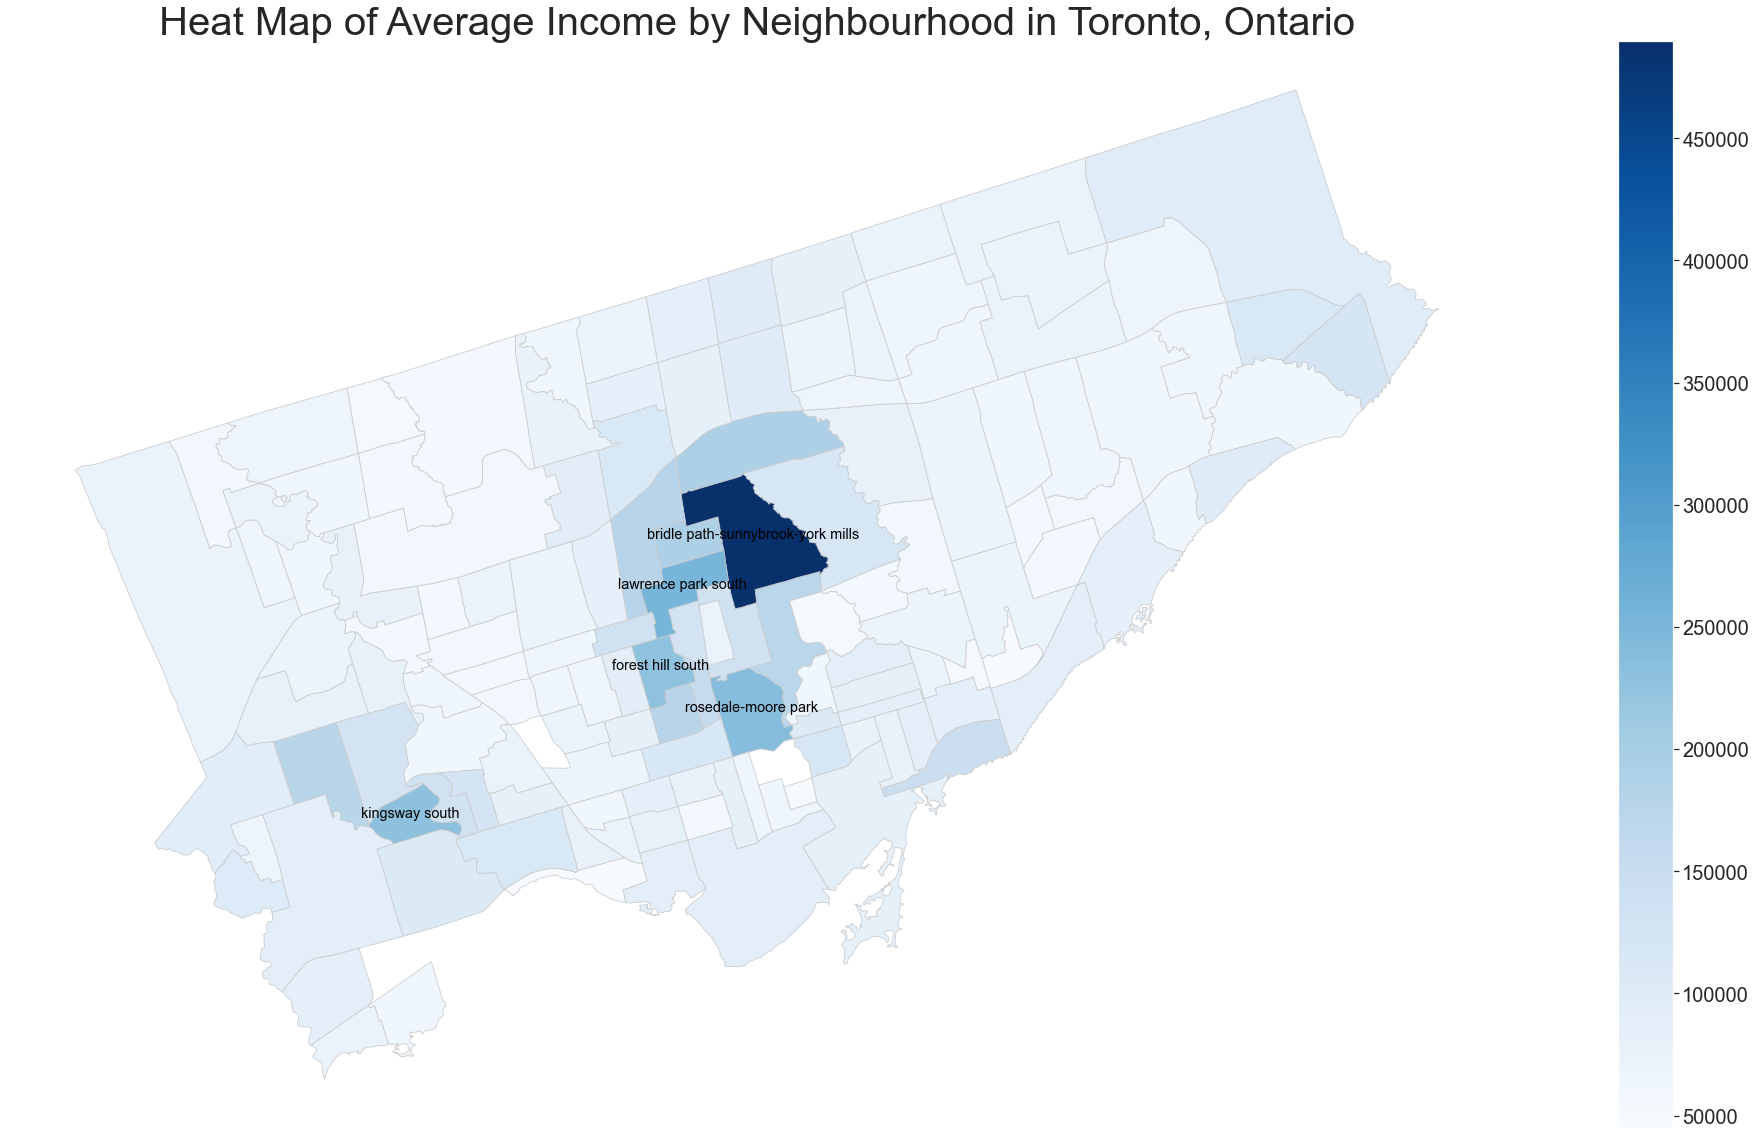

In [11]:
# Creat a heatmap
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Average Income by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Blues'
vmin, vmax = 45000, 490000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

# actually plot the map
# we will only annotate the plot for neighbourhoods with more than average income of 200,000
income_merged.plot('Average_Income', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in income_merged.iterrows():
    if(row['Average_Income'] > 200000):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
        
plt.show()

## House prices & population heatmaps

In [12]:
edited_final_df = pd.read_csv('Edited_Final_Data.csv', index_col='Hood_ID')
edited_final_df.drop('Unnamed: 0', axis='columns', inplace=True)
edited_final_df = edited_final_df.loc[:, ['Neighbourhood', 'Home Prices', 'Population, 2016']]
edited_final_df.head()

,Neighbourhood,Home Prices,"Population, 2016"
Hood_ID,,,
85,South Parkdale,500054.0,21849.0
70,South Riverdale,537087.0,27876.0
40,St.Andrew-Windfields,1363202.0,17812.0
61,Taylor-Massey,254151.0,15683.0
21,Humber Summit,354381.0,12416.0


In [13]:
# Join the dataset with the available mapping files.
house_pop_merged = regions.set_index('FIELD_6').join(edited_final_df)
house_pop_merged = house_pop_merged.reset_index()
house_pop_merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'Home Prices', 'Population, 2016']].sample(5)

,neighbourhood,FIELD_11,FIELD_12,geometry,Home Prices,"Population, 2016"
57,thorncliffe park,-79.349984,43.707749,"POLYGON ((-79.33542 43.70320, -79.33573 43.703...",313618.0,21108.0
48,south parkdale,-79.439338,43.636700,"POLYGON ((-79.42778 43.62979, -79.42948 43.630...",500054.0,21849.0
16,mimico,-79.500137,43.615924,"POLYGON ((-79.48040 43.62107, -79.48033 43.621...",429941.0,33964.0
116,flemingdon park,-79.332646,43.715930,"POLYGON ((-79.33791 43.70770, -79.33788 43.707...",204104.0,21933.0
56,thistletown-beaumond heights,-79.563491,43.737988,"POLYGON ((-79.57751 43.73384, -79.57806 43.734...",414216.0,10360.0


In [14]:
print(min(house_pop_merged['Home Prices']))
print(max(house_pop_merged['Home Prices']))
print(min(house_pop_merged['Population, 2016']))
print(max(house_pop_merged['Population, 2016']))

204104.0
1849084.0
6577.0
65913.0


<ipython-input-15-a9b0bc26e8da>:19: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),


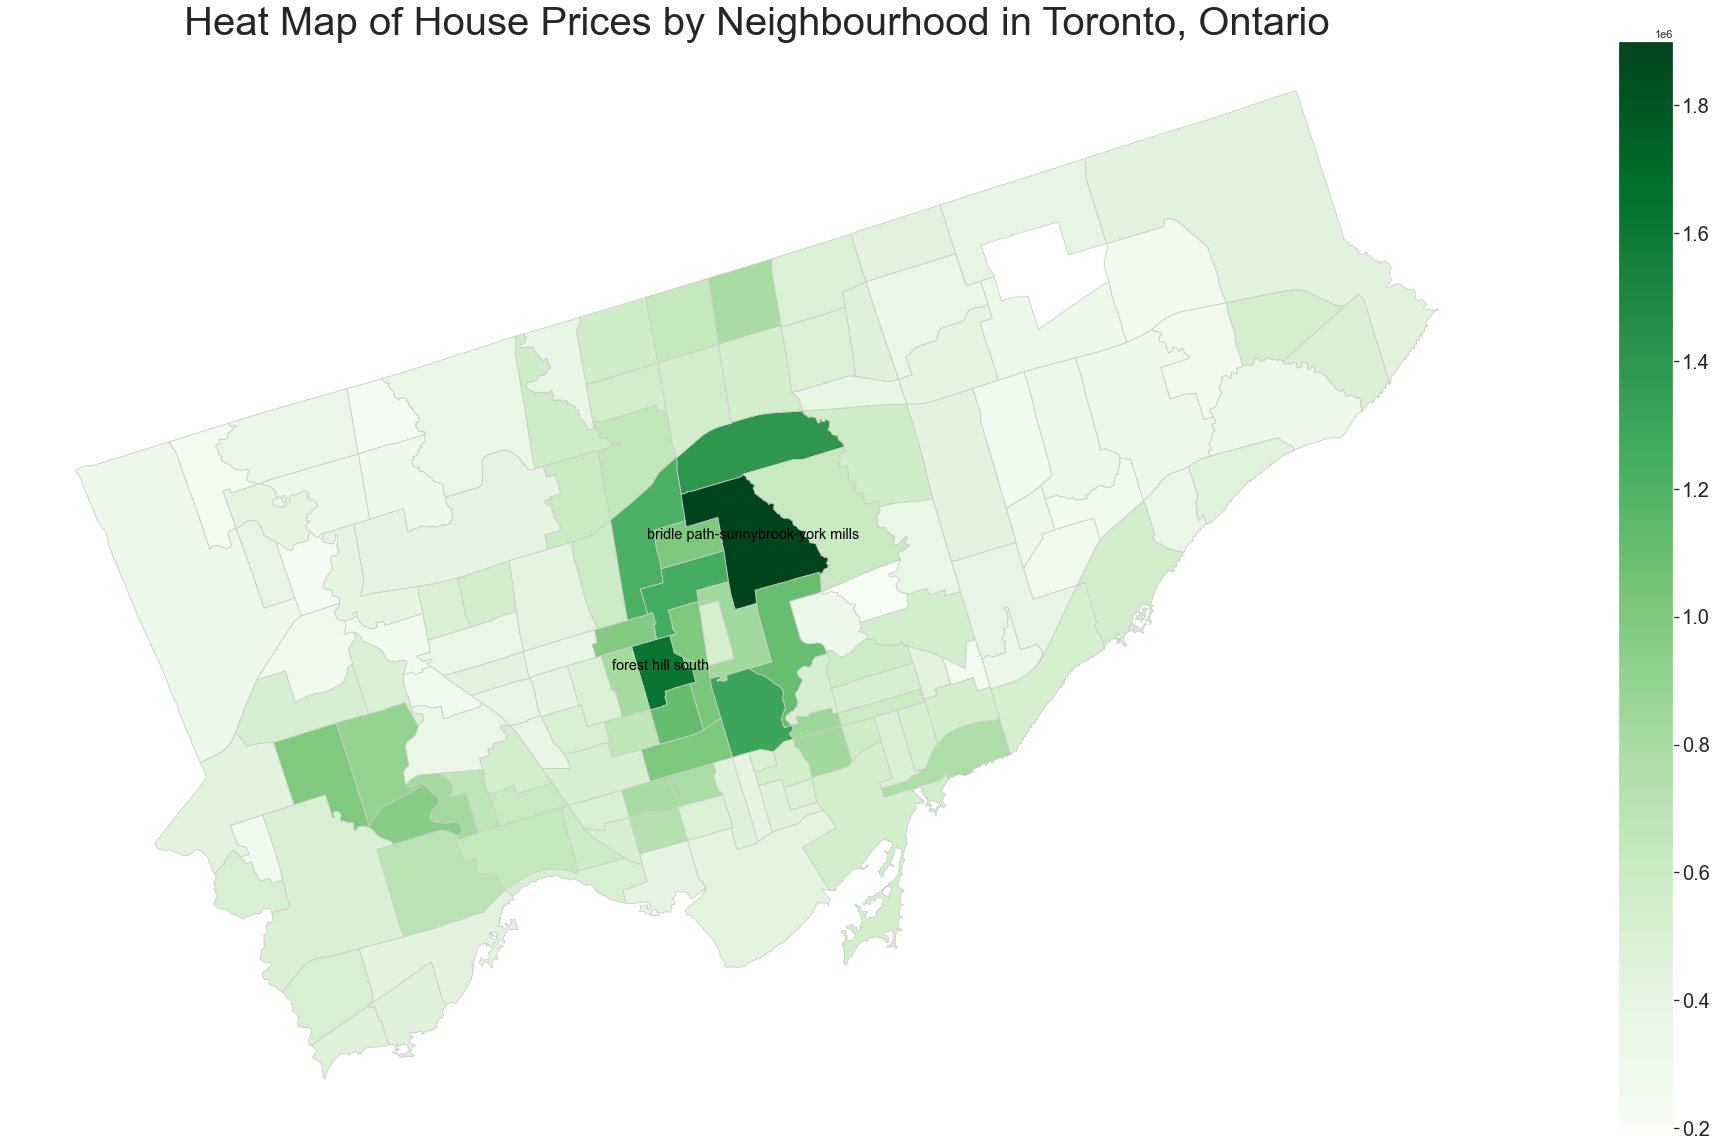

In [15]:
# Create a heatmap
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of House Prices by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Greens'
vmin, vmax = 200000, 1900000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
# we will only annotate the plot for neighbourhoods with more than 1,500,000 house prices
house_pop_merged.plot('Home Prices', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in house_pop_merged.iterrows():
    if(row['Home Prices'] > 1500000):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
        
plt.show()

<ipython-input-16-6c3d15eef56e>:19: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),


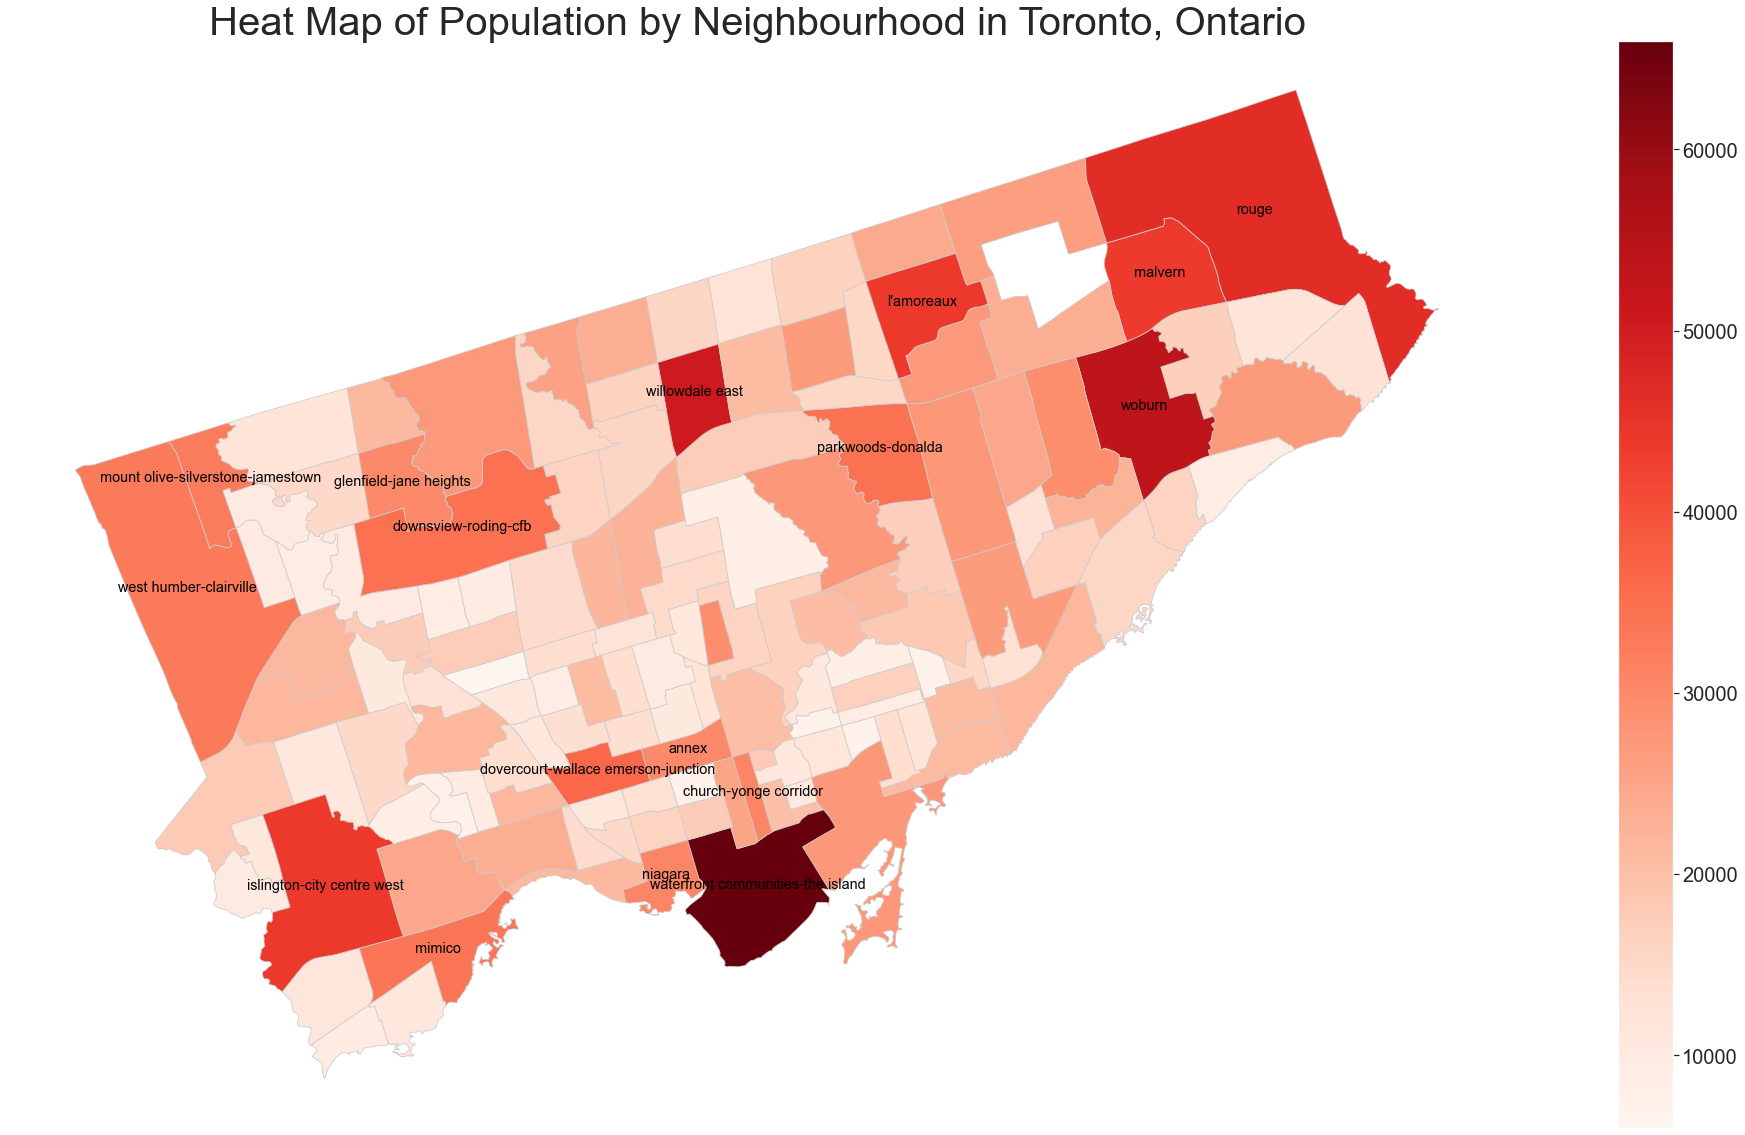

In [16]:
# Creat a heatmap
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Population by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Reds'
vmin, vmax = 6000, 66000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
# we will only annotate the plot for neighbourhoods with more than population of 30,000
house_pop_merged.plot('Population, 2016', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in house_pop_merged.iterrows():
    if(row['Population, 2016'] > 30000):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
        
plt.show()